In [1]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#mesmo modelo usando scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
#Pacote sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [49]:
#Importa o arquivo
df_salario = pd.read_csv('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/Stats_Salary.csv',encoding='latin-1')

In [15]:
#Numero de registros e colunas
df_salario.shape

(651, 31)

In [16]:
#tipo de dados
df_salario.dtypes

Player              object
NBA_Country         object
NBA_DraftNumber      int64
Salary              object
Signed Using        object
Guaranteed          object
Pos                 object
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
VORP               float64
dtype: object

In [17]:
df_salario.head()

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,China,43,"$815,615",MLE,"$815,615",C,22,HOU,16,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,Georgia,42,"$3,477,600",NaN,"$3,477,600",C,33,GSW,66,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,USA,19,"$12,307,692",Cap space,"$24,000,000",PF,36,SAC,59,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,USA,13,"$3,202,217",1st Round Pick,"$3,202,217",SG,22,CHI,24,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,USA,10,"$3,057,240",1st Round Pick,"$6,686,160",C,20,POR,62,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [50]:
# Remove '$' e as  virgulas
df_salario['Salary'] = df_salario['Salary'].str.replace('$','')
df_salario['Salary'] = df_salario['Salary'].str.replace(',','')
df_salario['Guaranteed'] = df_salario['Guaranteed'].str.replace('$','')
df_salario['Guaranteed'] = df_salario['Guaranteed'].str.replace(',','')
#converte para float
df_salario['Salary'] = df_salario['Salary'].astype('float')
df_salario['Guaranteed'] = df_salario['Guaranteed'].astype('float')


In [30]:
#definindo novo tamanho de plot
plt.rcParams["figure.figsize"] = (18,12)

In [34]:
df_salario.describe()

,NBA_DraftNumber,Salary,Guaranteed,Age,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,651.000000,6.510000e+02,6.510000e+02,651.000000,651.000000,651.000000,651.000000,647.000000,647.000000,647.000000,...,647.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,31.809524,5.871232e+06,1.382279e+07,26.185868,42.061444,946.835637,12.644547,0.527759,0.347260,0.255465,...,12.846213,18.580184,1.012289,0.948080,1.965284,0.069949,-1.672657,-0.725038,-2.397696,0.452842
std,21.880950,7.076999e+06,2.551679e+07,4.111618,26.584887,808.079175,8.860364,0.142885,0.233669,0.277744,...,6.736333,6.169759,1.710043,0.991398,2.493479,0.158892,5.220291,2.639161,6.098119,1.116383
min,1.000000,0.000000e+00,0.000000e+00,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-39.000000,-20.000000,-59.000000,-1.300000
25%,12.000000,1.312611e+06,1.312611e+06,23.000000,16.000000,177.000000,9.100000,0.496000,0.167000,0.146000,...,9.550000,14.650000,0.000000,0.100000,0.100000,0.030000,-3.200000,-1.900000,-4.200000,-0.100000
50%,27.000000,2.500000e+06,3.807146e+06,26.000000,46.000000,740.000000,12.800000,0.542000,0.359000,0.227000,...,12.100000,17.600000,0.400000,0.600000,1.000000,0.079000,-1.300000,-0.600000,-1.700000,0.000000
75%,60.000000,8.000000e+06,1.400000e+07,29.000000,69.000000,1596.000000,16.100000,0.580000,0.489500,0.318000,...,15.600000,22.150000,1.600000,1.500000,3.100000,0.119500,0.200000,0.600000,0.400000,0.700000
max,62.000000,3.468255e+07,2.011588e+08,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,...,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


In [51]:
#removendo colunas
remove_colunas = ['PER','TS%','OWS','WS','WS/48','OBPM','DBPM','BPM','VORP','DWS','Signed Using'] 
df_salario.drop(remove_colunas,inplace=True,axis=1)

In [52]:
df_salario.columns

Index(['Player', 'NBA_Country', 'NBA_DraftNumber', 'Salary', 'Guaranteed',
       'Pos', 'Age', 'Tm', 'G', 'MP', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%'],
      dtype='object')

In [53]:
#Correlação
cor = df_salario.corr()

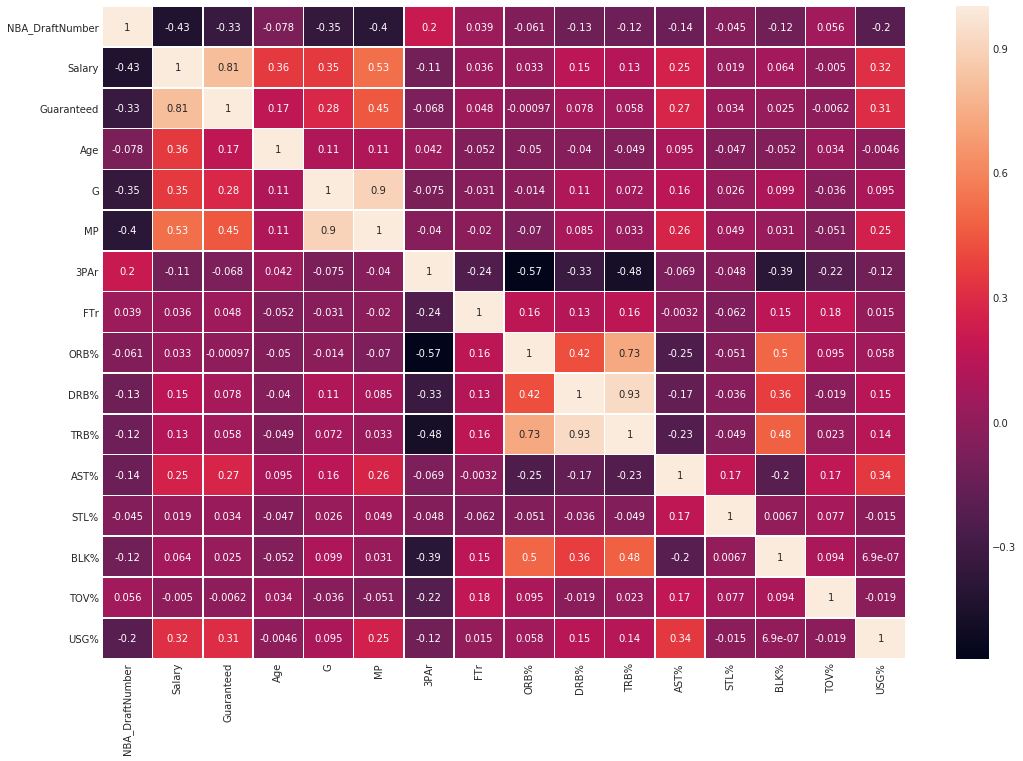

In [54]:
sns.set_style("whitegrid")
sns.heatmap(cor,annot = True,linewidths=.5)

## Com base no grau de correlação das variaveis com a variavel salario, iremos selecionar as seguintes informaçoes:<br>
##### NBA_DraftNumber = -0,43 (Um maior valor nesse campo reflete um menor salario)
##### Age
##### G
##### MP
##### USG%

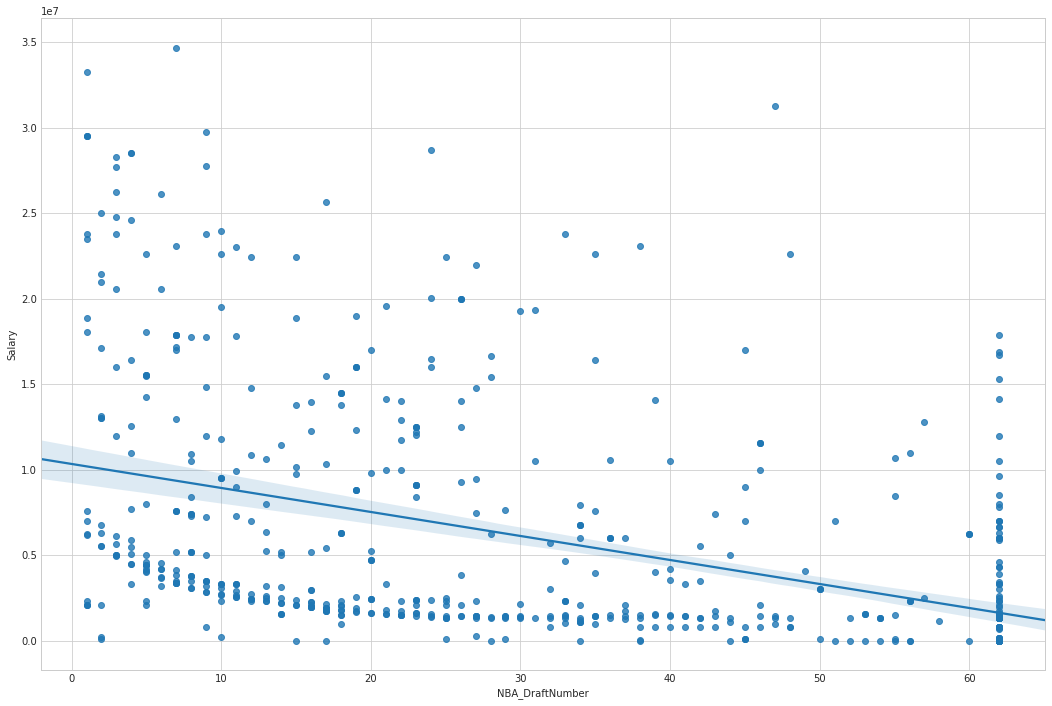

In [58]:
#Scatterplot
sns.regplot(x='NBA_DraftNumber',y='Salary',data=df_salario)

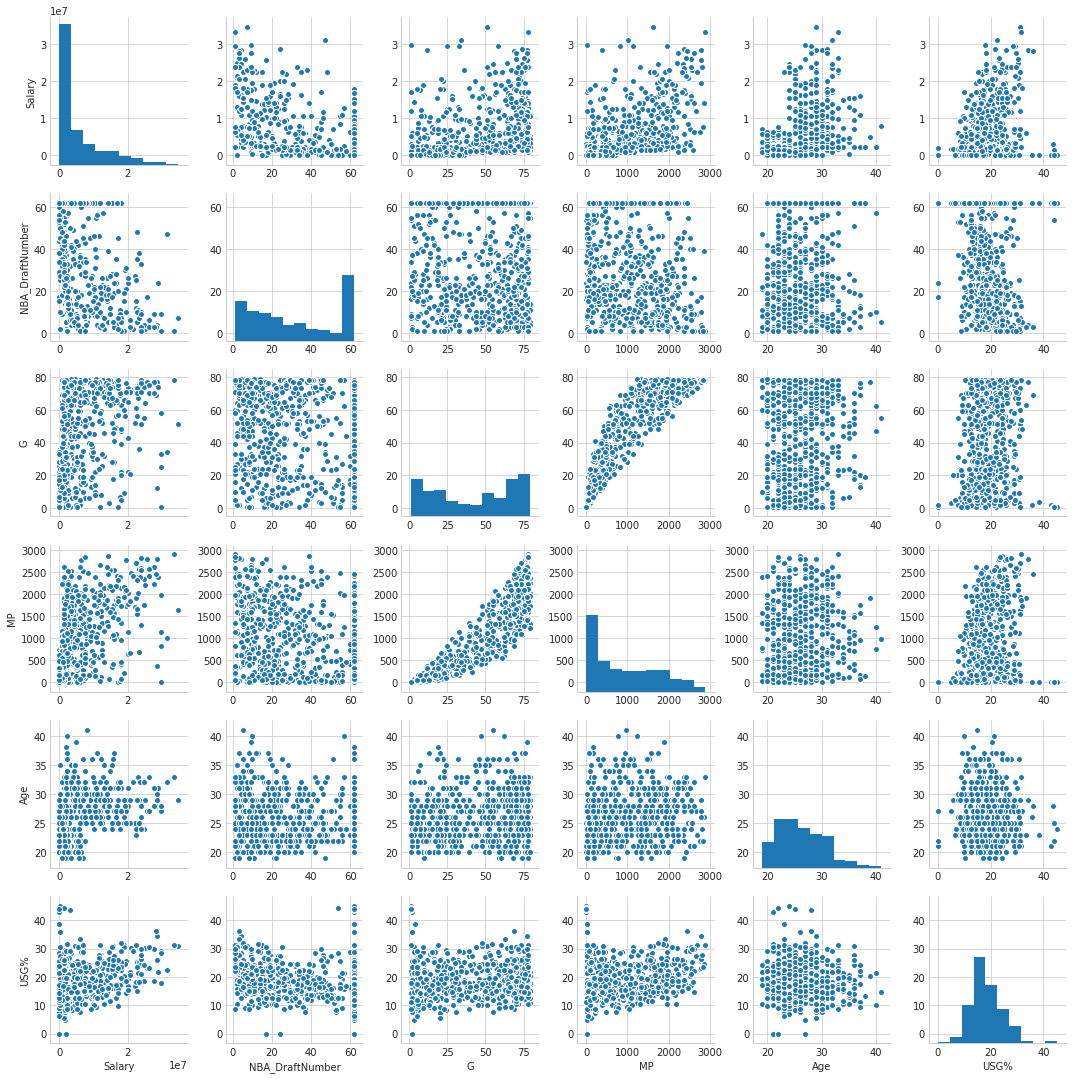

In [71]:
sns.pairplot(df_salario[['Salary','NBA_DraftNumber','G','MP','Age','USG%']])